<a href="https://colab.research.google.com/github/GusdPaula/postgraduation_fiap/blob/main/tech_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Importando libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib
matplotlib.rcParams["axes.formatter.limits"] = (-99, 99)

In [118]:
# Lendo a base dados de exportação de vinho de mesa
exportacao_vinho_mesa = pd.read_csv('/content/drive/MyDrive/pos_fiap/ExpVinho.csv', sep=';', header=None)
del exportacao_vinho_mesa[0]
exportacao_vinho_mesa.drop(index=0, axis=0,inplace=True)
exportacao_vinho_mesa

,1,2,3,4,5,6,7,8,9,10,...,100,101,102,103,104,105,106,107,108,109
1,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
2,África do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
4,Angola,0,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
5,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Tuvalu,0,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,0,0
134,Uruguai,0,0,0,0,0,0,0,0,0,...,6180,18497,0,0,136774,149842,637117,997367,326093,454271
135,Vanuatu,0,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
136,Venezuela,0,0,3200,2000,1350,750,11700,6458,9830,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512


In [119]:
# Configurando variáveis para ajustart colunas
columns = list()
ano = 1970

In [120]:
# Ajustando colunas
for col in exportacao_vinho_mesa.columns:
    if col == 1:
        new_col = 'pais'

    elif int(col) % 2 == 0:
        new_col = f'litros_{ano}'

    else:
        new_col = f'valor_dolar_{ano}'
        ano +=1

    columns.append(new_col)


In [121]:
# Obtendo os útimos 15 anos
exportacao_vinho_mesa.columns = columns
pais = exportacao_vinho_mesa['pais']
exportacao_vinho_mesa = exportacao_vinho_mesa.iloc[:,-30:]
exportacao_vinho_mesa = pd.concat([pais, exportacao_vinho_mesa], axis=1)

In [122]:
exportacao_vinho_mesa = exportacao_vinho_mesa.rename(columns={0:'pais'})
exportacao_vinho_mesa['pais'] = exportacao_vinho_mesa['pais'].str.replace('Alemanha, República Democrática', 'Alemanha')

In [123]:
exportacao_vinho_mesa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 1 to 137
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pais              137 non-null    object
 1   litros_2009       137 non-null    int64 
 2   valor_dolar_2009  137 non-null    int64 
 3   litros_2010       137 non-null    int64 
 4   valor_dolar_2010  137 non-null    int64 
 5   litros_2011       137 non-null    int64 
 6   valor_dolar_2011  137 non-null    int64 
 7   litros_2012       137 non-null    int64 
 8   valor_dolar_2012  137 non-null    int64 
 9   litros_2013       137 non-null    int64 
 10  valor_dolar_2013  137 non-null    int64 
 11  litros_2014       137 non-null    int64 
 12  valor_dolar_2014  137 non-null    int64 
 13  litros_2015       137 non-null    int64 
 14  valor_dolar_2015  137 non-null    int64 
 15  litros_2016       137 non-null    int64 
 16  valor_dolar_2016  137 non-null    int64 
 17  litros_2017     

In [124]:
# Definindo colunas para soma
cols_to_sum_litros = [col for col in exportacao_vinho_mesa.columns if 'litros' in col]
cols_to_sum_valor = [col for col in exportacao_vinho_mesa.columns if 'valor' in col]

In [125]:
# Consolidando informaçãos para uma tabela
exportacao_vinho_mesa['litros_15_anos'] = exportacao_vinho_mesa[cols_to_sum_litros].sum(axis=1)
exportacao_vinho_mesa['valor_15_anos'] = exportacao_vinho_mesa[cols_to_sum_valor].sum(axis=1)
exportacao_vinho_mesa_cons = exportacao_vinho_mesa[['pais', 'litros_15_anos', 'valor_15_anos']]
exportacao_vinho_mesa_cons

,pais,litros_15_anos,valor_15_anos
1,Afeganistão,11,46
2,África do Sul,147,814
3,Alemanha,648115,2148277
4,Angola,143147,505106
5,Anguilla,0,0
...,...,...,...
133,Tuvalu,2,4
134,Uruguai,1118688,1674149
135,Vanuatu,18,31
136,Venezuela,196545,309340


In [126]:
# Obtendo os 10 países que mais exportaram em dólar
dez_paises_por_valor = exportacao_vinho_mesa_cons.sort_values(by='valor_15_anos', ascending=False).iloc[:10]

In [127]:
# Obtendo os 10 países que mais exportaram em litros
dez_paises_por_litro = exportacao_vinho_mesa_cons.sort_values(by='litros_15_anos', ascending=False).iloc[:10]

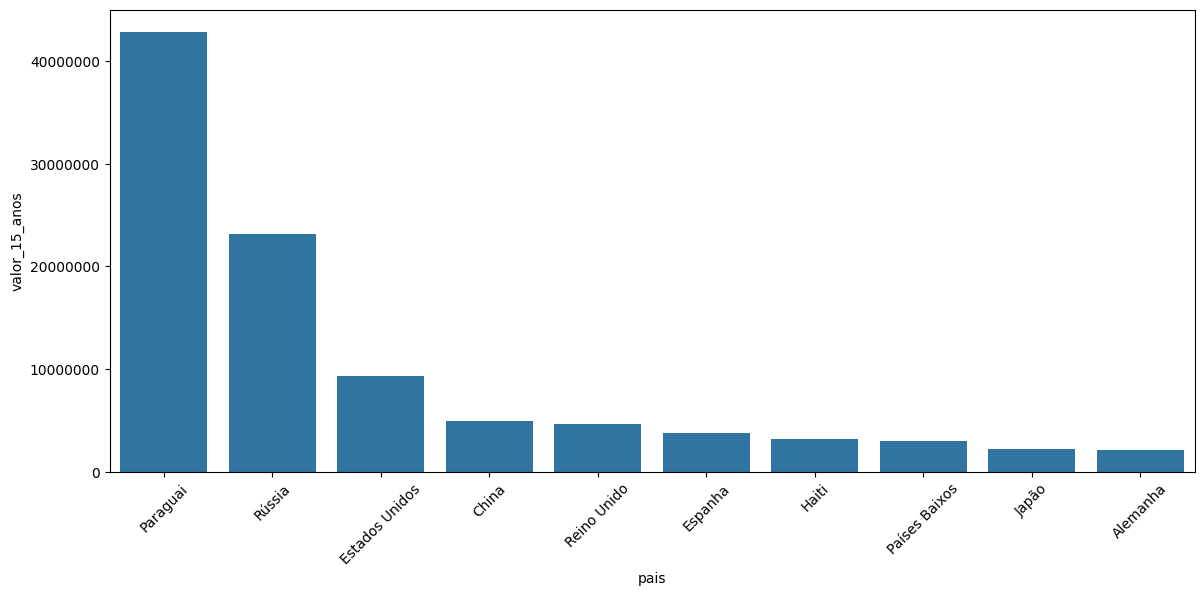

In [128]:
# Explorando dados do valor exportado
plt.figure(figsize=(14,6))
sns.barplot(data=dez_paises_por_valor, x='pais', y='valor_15_anos')
plt.xticks(rotation=45)
plt.show()

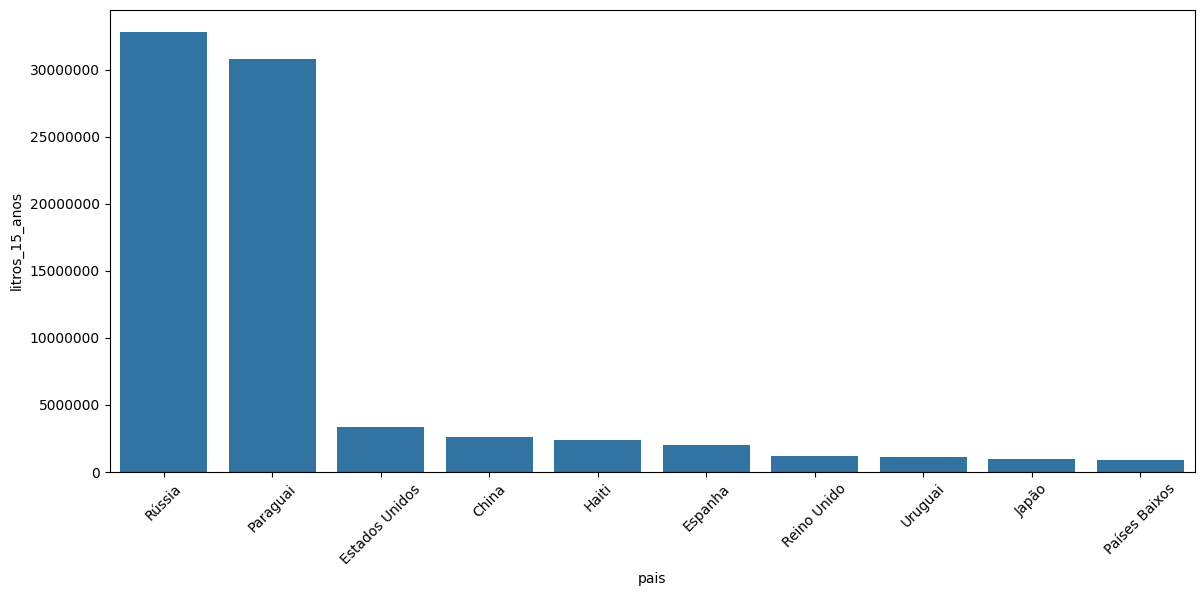

In [129]:
# Explorando dados dos litros exportado
plt.figure(figsize=(14,6))
sns.barplot(data=dez_paises_por_litro, x='pais', y='litros_15_anos')
plt.xticks(rotation=45)
plt.show()

# Provavelmente existe este delta por conta do câmbio... será preciso encontrar um mode de normalizar isto.

In [130]:
USD_BRL = yf.Ticker("USDBRL=X")
df_usd_brl = USD_JPY.history(period='max', interval='1mo')
df_usd_brl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,2.946,2.948,2.805,2.901,0,0.0,0.0
2004-01-01 00:00:00+00:00,2.901,2.950,2.774,2.932,0,0.0,0.0
2004-02-01 00:00:00+00:00,2.932,3.010,2.895,2.905,0,0.0,0.0
2004-03-01 00:00:00+00:00,2.905,2.945,2.858,2.895,0,0.0,0.0
2004-04-01 00:00:00+01:00,2.895,2.965,2.866,2.930,0,0.0,0.0


In [131]:
df_usd_brl['ano'] = df_usd_brl.index.year
df_usd_brl = df_usd_brl[df_usd_brl['ano'] > 2008]
df_usd_brl = df_usd_brl[df_usd_brl['ano'] != 2024]

df_usd_brl['mes'] = df_usd_brl.index.month
df_usd_brl = df_usd_brl[df_usd_brl['mes'] == 12]

df_usd_brl

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ano,mes
Date,,,,,,,,,
2009-12-01 00:00:00+00:00,1.705500,1.798300,1.658700,1.743000,0,0.0,0.0,2009,12
2010-12-01 00:00:00+00:00,1.663900,1.717000,1.621700,1.662000,0,0.0,0.0,2010,12
2011-12-01 00:00:00+00:00,1.800000,1.884400,1.763800,1.865200,0,0.0,0.0,2011,12
2012-12-01 00:00:00+00:00,2.135500,2.140300,2.022300,2.045100,0,0.0,0.0,2012,12
2013-12-01 00:00:00+00:00,2.330800,2.391400,2.289400,2.359300,0,0.0,0.0,2013,12
2014-12-01 00:00:00+00:00,2.560900,2.754800,2.541300,2.654100,0,0.0,0.0,2014,12
2015-12-01 00:00:00+00:00,3.867100,4.035300,3.717000,3.956700,0,0.0,0.0,2015,12
2016-12-01 00:00:00+00:00,3.404200,3.577300,3.242100,3.253200,0,0.0,0.0,2016,12
2017-12-01 00:00:00+00:00,3.271300,3.344400,3.219300,3.311000,0,0.0,0.0,2017,12


In [132]:
df_usd_brl = df_usd_brl['Close']

<Axes: xlabel='Date'>

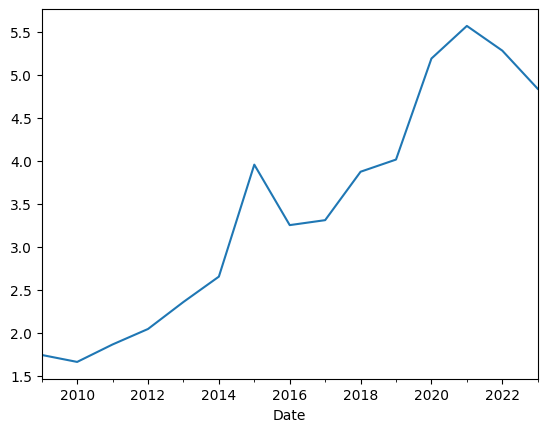

In [133]:
df_usd_brl.plot()

In [134]:
# Criando df para analizar tendência por litro
cols_to_sum_litros.insert(0, 'pais')
cols_to_sum_litros.insert(1, 'litros_15_anos')
exportacao_vinho_mesa_litros = exportacao_vinho_mesa[cols_to_sum_litros]
dez_paises_por_litro = exportacao_vinho_mesa_litros.sort_values(by='litros_15_anos', ascending=False).iloc[:10]

dez_paises_por_litro

,pais,litros_15_anos,litros_2009,litros_2010,litros_2011,litros_2012,litros_2013,litros_2014,litros_2015,litros_2016,litros_2017,litros_2018,litros_2019,litros_2020,litros_2021,litros_2022,litros_2023
113,Rússia,32822141,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,0
104,Paraguai,30803247,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378
51,Estados Unidos,3349299,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,229839
31,China,2574686,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,73917
65,Haiti,2351228,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503,559645
50,Espanha,1990238,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,180
111,Reino Unido,1150780,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316,18835,11326
134,Uruguai,1118688,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117,326093
78,Japão,972341,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621,36442,39491,37324,22942
101,Países Baixos,897986,171654,87368,125414,134879,57792,165289,44987,42953,0,9451,44882,248,3791,7034,2244


In [135]:
dez_paises_por_litro.set_index(dez_paises_por_litro['pais'], inplace=True)
del dez_paises_por_litro['pais']
del dez_paises_por_litro['litros_15_anos']
dez_paises_por_litro

,litros_2009,litros_2010,litros_2011,litros_2012,litros_2013,litros_2014,litros_2015,litros_2016,litros_2017,litros_2018,litros_2019,litros_2020,litros_2021,litros_2022,litros_2023
pais,,,,,,,,,,,,,,,
Rússia,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,0
Paraguai,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378
Estados Unidos,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,229839
China,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,73917
Haiti,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503,559645
Espanha,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,180
Reino Unido,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316,18835,11326
Uruguai,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117,326093
Japão,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621,36442,39491,37324,22942


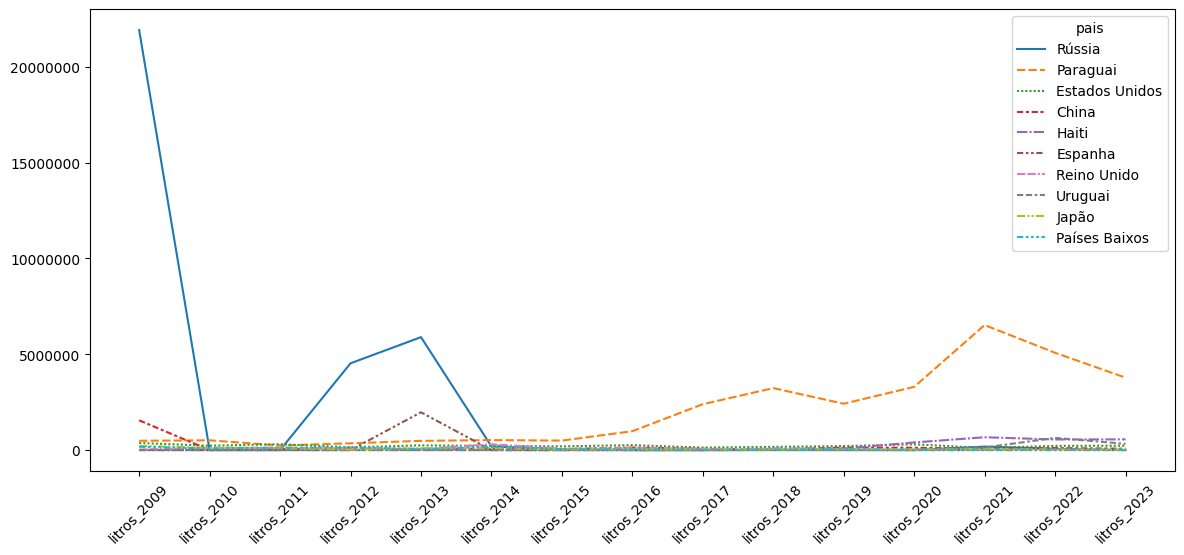

In [136]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.T)
plt.xticks(rotation=45)
plt.show()

In [137]:
dez_paises_por_litro.columns = [col.replace('litros_','') for col in dez_paises_por_litro.columns]

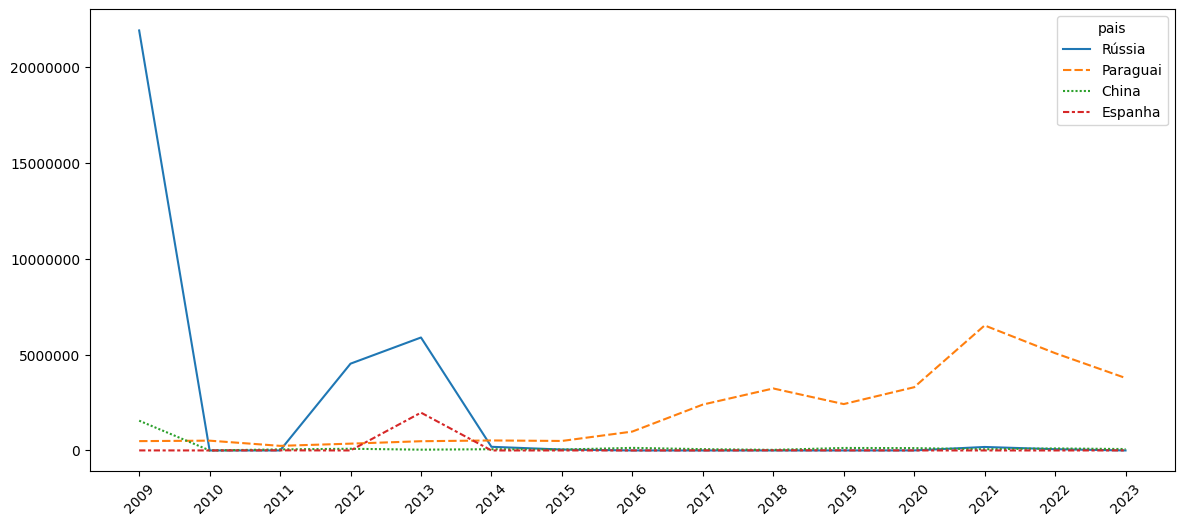

In [138]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index in ["Rússia", "Paraguai", "Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

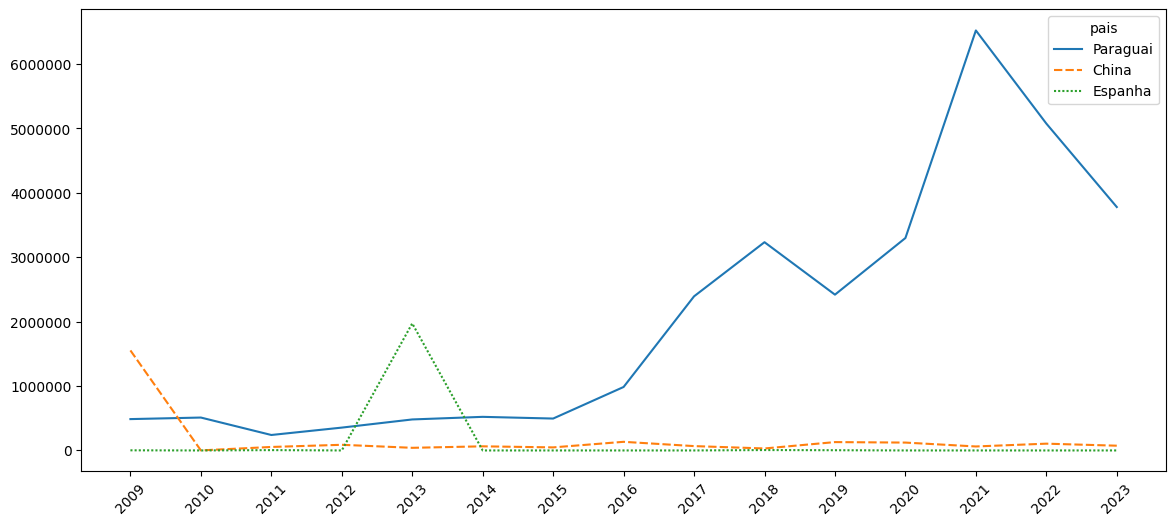

In [139]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index in ["Paraguai", "Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

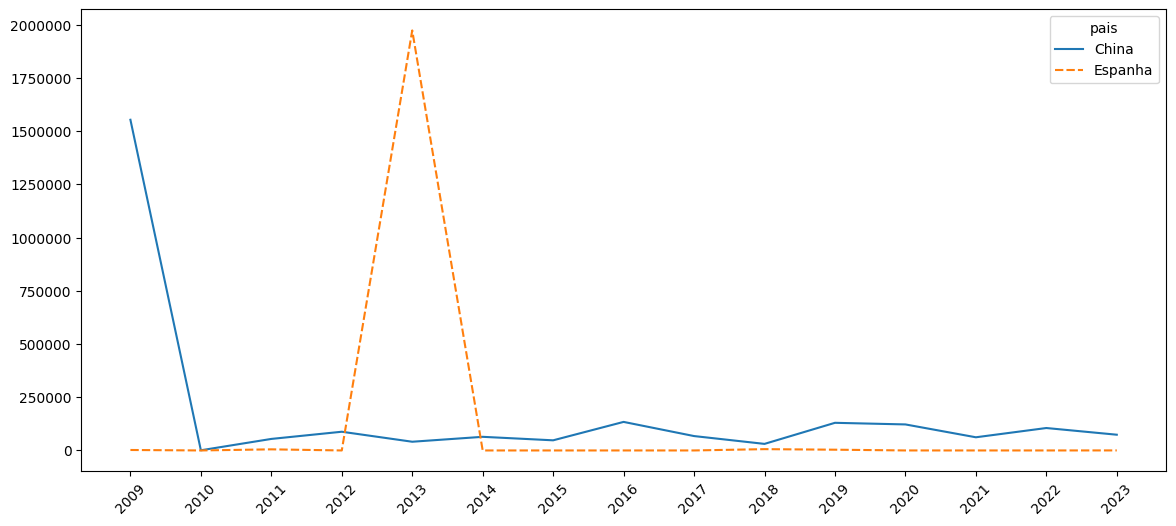

In [140]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index in ["Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

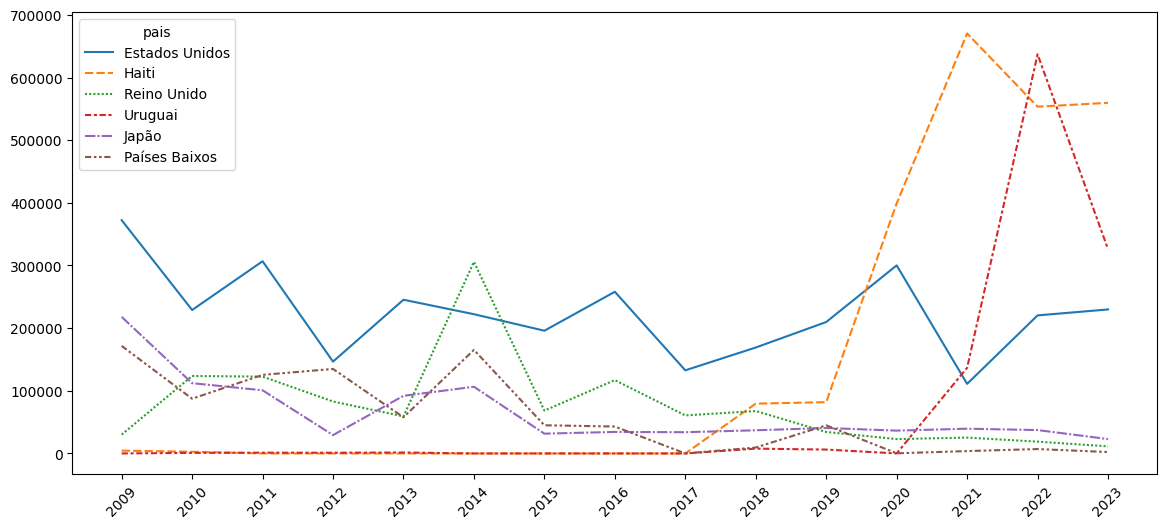

In [141]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index not in ["Rússia", "Paraguai", "Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

##Tendência Valor

In [142]:
# Criando df para analizar tendência por valor
cols_to_sum_valor.insert(0, 'pais')
cols_to_sum_valor.insert(1, 'valor_15_anos')
exportacao_vinho_mesa_valor = exportacao_vinho_mesa[cols_to_sum_valor]
dez_paises_por_valor = exportacao_vinho_mesa_valor.sort_values(by='valor_15_anos', ascending=False).iloc[:10]

dez_paises_por_valor

,pais,valor_15_anos,valor_dolar_2009,valor_dolar_2010,valor_dolar_2011,valor_dolar_2012,valor_dolar_2013,valor_dolar_2014,valor_dolar_2015,valor_dolar_2016,valor_dolar_2017,valor_dolar_2018,valor_dolar_2019,valor_dolar_2020,valor_dolar_2021,valor_dolar_2022,valor_dolar_2023
104,Paraguai,42862206,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,5517263
113,Rússia,23151716,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,0
51,Estados Unidos,9309051,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,429091
31,China,4903695,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,183096
111,Reino Unido,4640935,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,84547
50,Espanha,3805889,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,0,4171
65,Haiti,3198849,5863,3750,0,0,0,0,0,0,0,144425,129803,471152,831181,741014,871661
101,Países Baixos,3012934,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031,1532,8484,37240,4958
78,Japão,2257163,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642,92674,90275,82208,57780
3,Alemanha,2148277,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853


In [143]:
dez_paises_por_valor.set_index(dez_paises_por_valor['pais'], inplace=True)
del dez_paises_por_valor['pais']
del dez_paises_por_valor['valor_15_anos']
dez_paises_por_valor

,valor_dolar_2009,valor_dolar_2010,valor_dolar_2011,valor_dolar_2012,valor_dolar_2013,valor_dolar_2014,valor_dolar_2015,valor_dolar_2016,valor_dolar_2017,valor_dolar_2018,valor_dolar_2019,valor_dolar_2020,valor_dolar_2021,valor_dolar_2022,valor_dolar_2023
pais,,,,,,,,,,,,,,,
Paraguai,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,5517263
Rússia,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,0
Estados Unidos,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,429091
China,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,183096
Reino Unido,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,84547
Espanha,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,0,4171
Haiti,5863,3750,0,0,0,0,0,0,0,144425,129803,471152,831181,741014,871661
Países Baixos,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031,1532,8484,37240,4958
Japão,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642,92674,90275,82208,57780


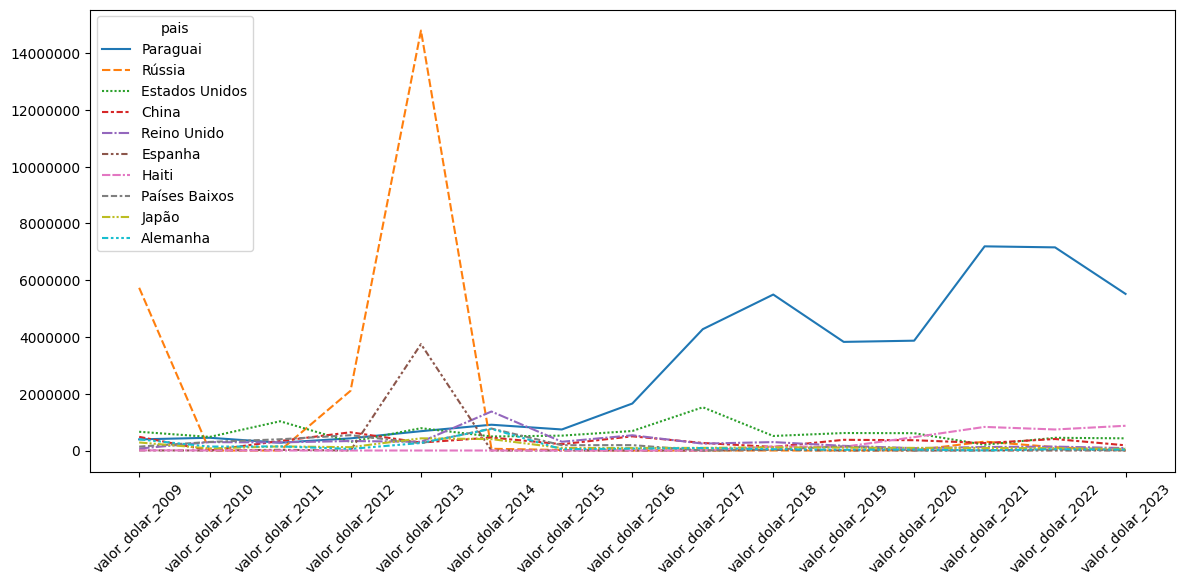

In [144]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.T)
plt.xticks(rotation=45)
plt.show()

In [145]:
dez_paises_por_valor.columns = [col.replace('valor_dolar_','') for col in dez_paises_por_valor.columns]

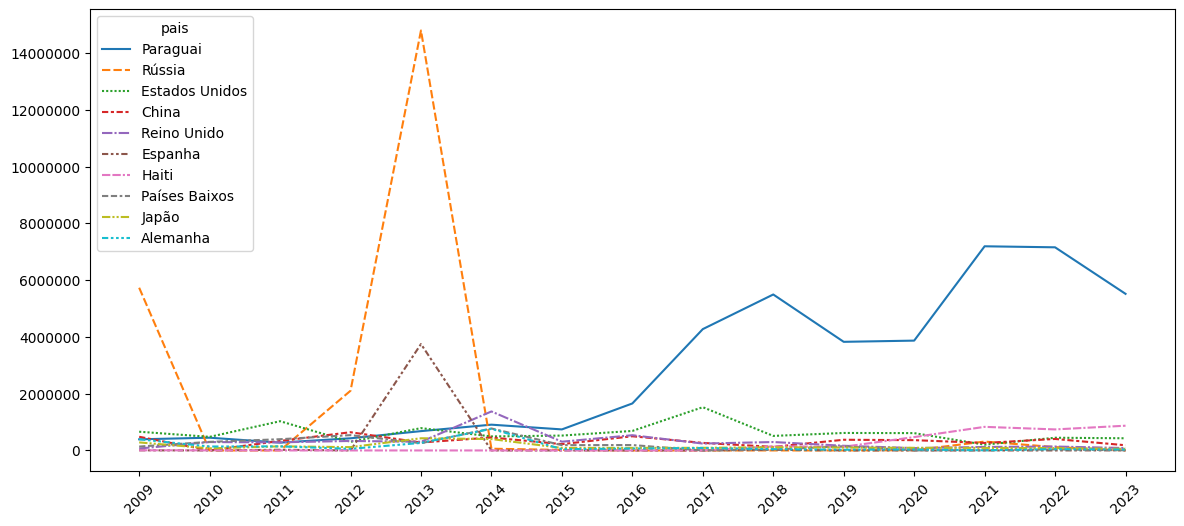

In [146]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.T)
plt.xticks(rotation=45)
plt.show()

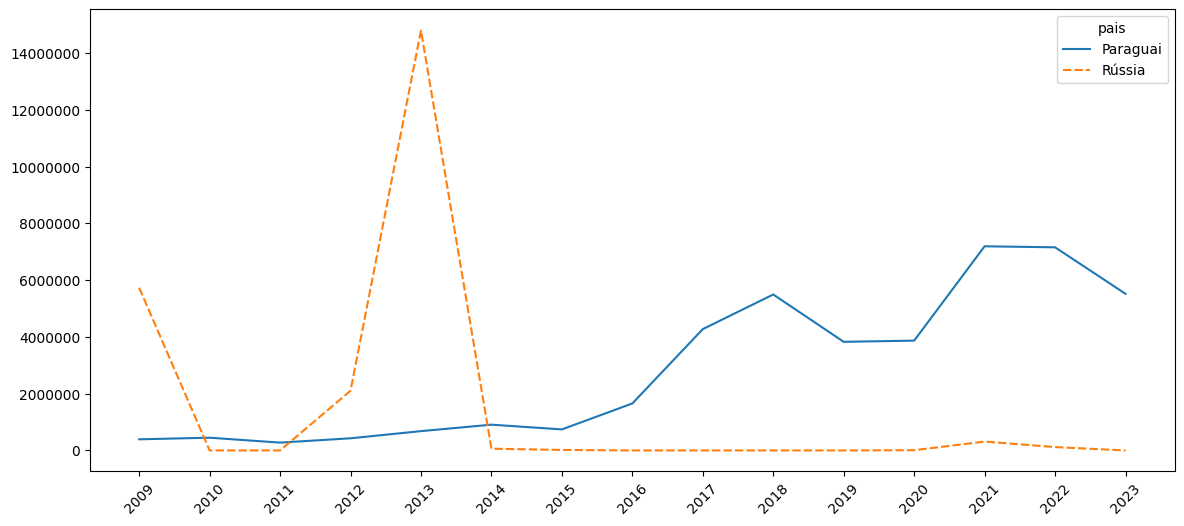

In [147]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.query('index in ["Rússia", "Paraguai"]').T)
plt.xticks(rotation=45)
plt.show()

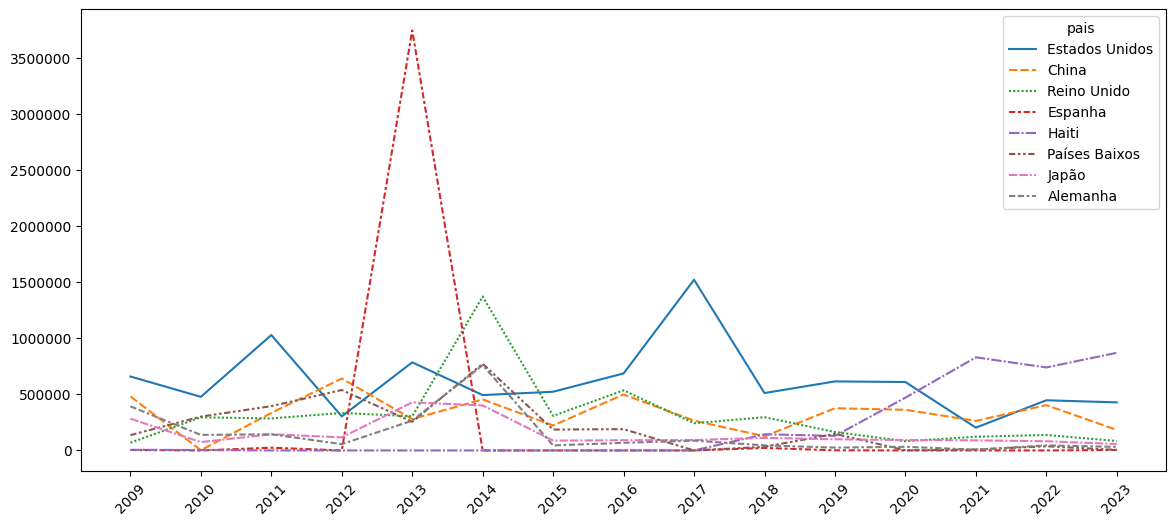

In [148]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.query('index not in ["Rússia", "Paraguai"]').T)
plt.xticks(rotation=45)
plt.show()

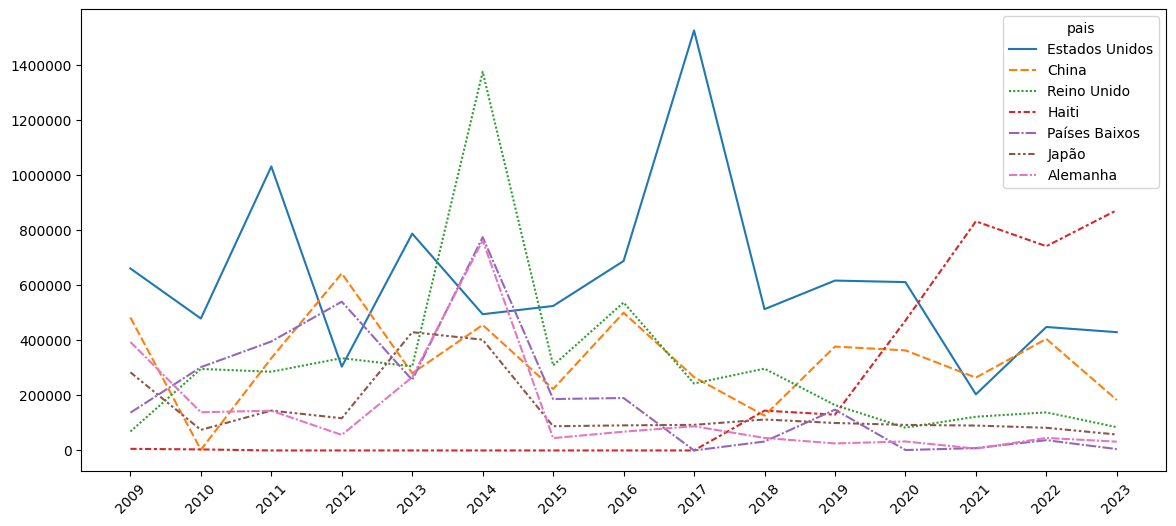

In [149]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.query('index not in ["Rússia", "Paraguai", "Espanha"]').T)
plt.xticks(rotation=45)
plt.show()

In [152]:
exportacao_vinho_mesa = exportacao_vinho_mesa.set_index('pais')
exportacao_vinho_mesa

,litros_2009,valor_dolar_2009,litros_2010,valor_dolar_2010,litros_2011,valor_dolar_2011,litros_2012,valor_dolar_2012,litros_2013,valor_dolar_2013,...,litros_2020,valor_dolar_2020,litros_2021,valor_dolar_2021,litros_2022,valor_dolar_2022,litros_2023,valor_dolar_2023,litros_15_anos,valor_15_anos
pais,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,11,46
África do Sul,0,0,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,147,814
Alemanha,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,...,6261,32605,2698,6741,7630,45367,4806,31853,648115,2148277
Angola,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,...,0,0,0,0,4068,4761,0,0,143147,505106
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,0,0,2,4
Uruguai,0,0,914,2929,1238,4404,1135,3879,1526,13343,...,0,0,136774,149842,637117,997367,326093,454271,1118688,1674149
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,18,31,0,0,0,0,0,0,18,31


In [154]:
def preco_p_litro(df, ano):
    df[f'preco_litro_{ano}'] = df[f'litros_{ano}'] / df[f'valor_dolar_{ano}']

In [157]:
for year in range(2009, 2024):
    preco_p_litro(exportacao_vinho_mesa, year)

In [158]:
exportacao_vinho_mesa

,litros_2009,valor_dolar_2009,litros_2010,valor_dolar_2010,litros_2011,valor_dolar_2011,litros_2012,valor_dolar_2012,litros_2013,valor_dolar_2013,...,preco_litro_2014,preco_litro_2015,preco_litro_2016,preco_litro_2017,preco_litro_2018,preco_litro_2019,preco_litro_2020,preco_litro_2021,preco_litro_2022,preco_litro_2023
pais,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239130,NaN,NaN
África do Sul,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.273684,0.190476,NaN,NaN,0.167622
Alemanha,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,...,0.280112,0.238499,0.205729,0.176359,0.237848,0.143715,0.192026,0.400237,0.168184,0.150881
Angola,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,...,0.526812,0.111651,0.207940,0.164883,0.672779,0.323944,NaN,NaN,0.854442,NaN
Anguilla,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN
Uruguai,0,0,914,2929,1238,4404,1135,3879,1526,13343,...,NaN,NaN,NaN,NaN,0.260357,0.334108,NaN,0.912788,0.638799,0.717838
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.580645,NaN,NaN,NaN


In [159]:
exportacao_vinho_mesa.fillna(0, inplace=True)
exportacao_vinho_mesa

,litros_2009,valor_dolar_2009,litros_2010,valor_dolar_2010,litros_2011,valor_dolar_2011,litros_2012,valor_dolar_2012,litros_2013,valor_dolar_2013,...,preco_litro_2014,preco_litro_2015,preco_litro_2016,preco_litro_2017,preco_litro_2018,preco_litro_2019,preco_litro_2020,preco_litro_2021,preco_litro_2022,preco_litro_2023
pais,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239130,0.000000,0.000000
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.273684,0.190476,0.000000,0.000000,0.167622
Alemanha,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,...,0.280112,0.238499,0.205729,0.176359,0.237848,0.143715,0.192026,0.400237,0.168184,0.150881
Angola,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,...,0.526812,0.111651,0.207940,0.164883,0.672779,0.323944,0.000000,0.000000,0.854442,0.000000
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
Uruguai,0,0,914,2929,1238,4404,1135,3879,1526,13343,...,0.000000,0.000000,0.000000,0.000000,0.260357,0.334108,0.000000,0.912788,0.638799,0.717838
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.580645,0.000000,0.000000,0.000000


In [163]:
columns_p_litro = [col for col in exportacao_vinho_mesa.columns if 'preco_litro' in col]

In [164]:
exportacao_vinho_mesa_preco_p_litro = exportacao_vinho_mesa[columns_p_litro]

In [166]:
exportacao_vinho_mesa_preco_p_litro.columns = [col[-4:] for col in exportacao_vinho_mesa_preco_p_litro.columns]

In [169]:
list_dez_paises_por_valor = dez_paises_por_valor.index.to_list()
list_dez_paises_por_valor

['Paraguai',
 'Rússia',
 'Estados Unidos',
 'China',
 'Reino Unido',
 'Espanha',
 'Haiti',
 'Países Baixos',
 'Japão',
 'Alemanha']

In [171]:
exportacao_vinho_mesa_preco_p_litro_dez_paises_por_valor = exportacao_vinho_mesa_preco_p_litro.loc[list_dez_paises_por_valor]
exportacao_vinho_mesa_preco_p_litro_dez_paises_por_valor

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
pais,,,,,,,,,,,,,,,
Paraguai,1.241885,1.137561,0.869289,0.828488,0.707321,0.574704,0.668260,0.595463,0.559921,0.588638,0.632296,0.852625,0.906869,0.709399,0.685191
Rússia,3.822722,0.000000,0.000000,2.152208,0.398311,3.103125,2.613158,0.000000,0.000000,0.000000,0.000000,0.171111,0.581387,0.556796,0.000000
Estados Unidos,0.564063,0.478382,0.297778,0.482210,0.311952,0.449737,0.373770,0.375426,0.087083,0.329957,0.340376,0.491456,0.545727,0.492022,0.535642
China,3.220182,0.337150,0.161724,0.136886,0.146198,0.140642,0.213622,0.268415,0.254031,0.244071,0.344592,0.336785,0.234306,0.260462,0.403706
Reino Unido,0.437460,0.418087,0.429310,0.247680,0.193967,0.222608,0.221726,0.218089,0.249960,0.228106,0.208364,0.276988,0.206840,0.136333,0.133961
Espanha,0.538519,0.000000,0.211471,0.000000,0.526277,0.000000,0.000000,0.000000,0.000000,0.270558,2.616408,0.222222,0.000000,0.000000,0.043155
Haiti,0.767525,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550459,0.630748,0.847132,0.806538,0.746953,0.642044
Países Baixos,1.253031,0.289124,0.317218,0.249942,0.226024,0.213616,0.241264,0.225827,0.000000,0.291743,0.303193,0.161880,0.446841,0.188883,0.452602
Japão,0.769041,1.503162,0.697039,0.250348,0.214380,0.264890,0.359658,0.377564,0.365060,0.329280,0.407669,0.393228,0.437452,0.454019,0.397058


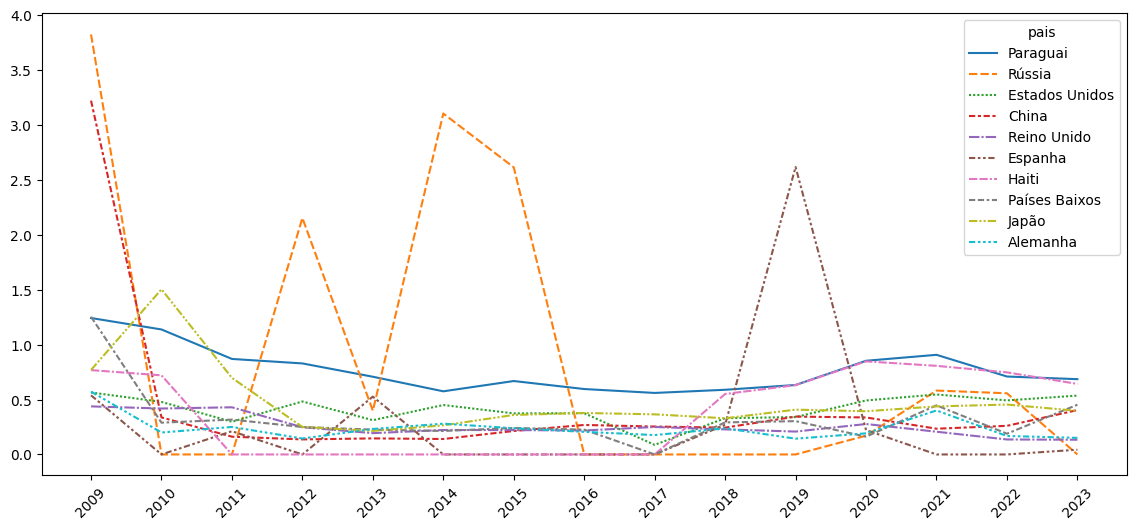

In [172]:
plt.figure(figsize=(14,6))
sns.lineplot(data=exportacao_vinho_mesa_preco_p_litro_dez_paises_por_valor.T)
plt.xticks(rotation=45)
plt.show()

In [173]:
list_dez_paises_por_litro = dez_paises_por_litro.index.to_list()
list_dez_paises_por_litro

['Rússia',
 'Paraguai',
 'Estados Unidos',
 'China',
 'Haiti',
 'Espanha',
 'Reino Unido',
 'Uruguai',
 'Japão',
 'Países Baixos']

In [174]:
exportacao_vinho_mesa_preco_p_litro_dez_paises_por_litro = exportacao_vinho_mesa_preco_p_litro.loc[list_dez_paises_por_litro]
exportacao_vinho_mesa_preco_p_litro_dez_paises_por_litro

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
pais,,,,,,,,,,,,,,,
Rússia,3.822722,0.000000,0.000000,2.152208,0.398311,3.103125,2.613158,0.000000,0.000000,0.000000,0.000000,0.171111,0.581387,0.556796,0.000000
Paraguai,1.241885,1.137561,0.869289,0.828488,0.707321,0.574704,0.668260,0.595463,0.559921,0.588638,0.632296,0.852625,0.906869,0.709399,0.685191
Estados Unidos,0.564063,0.478382,0.297778,0.482210,0.311952,0.449737,0.373770,0.375426,0.087083,0.329957,0.340376,0.491456,0.545727,0.492022,0.535642
China,3.220182,0.337150,0.161724,0.136886,0.146198,0.140642,0.213622,0.268415,0.254031,0.244071,0.344592,0.336785,0.234306,0.260462,0.403706
Haiti,0.767525,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550459,0.630748,0.847132,0.806538,0.746953,0.642044
Espanha,0.538519,0.000000,0.211471,0.000000,0.526277,0.000000,0.000000,0.000000,0.000000,0.270558,2.616408,0.222222,0.000000,0.000000,0.043155
Reino Unido,0.437460,0.418087,0.429310,0.247680,0.193967,0.222608,0.221726,0.218089,0.249960,0.228106,0.208364,0.276988,0.206840,0.136333,0.133961
Uruguai,0.000000,0.312052,0.281108,0.292601,0.114367,0.000000,0.000000,0.000000,0.000000,0.260357,0.334108,0.000000,0.912788,0.638799,0.717838
Japão,0.769041,1.503162,0.697039,0.250348,0.214380,0.264890,0.359658,0.377564,0.365060,0.329280,0.407669,0.393228,0.437452,0.454019,0.397058


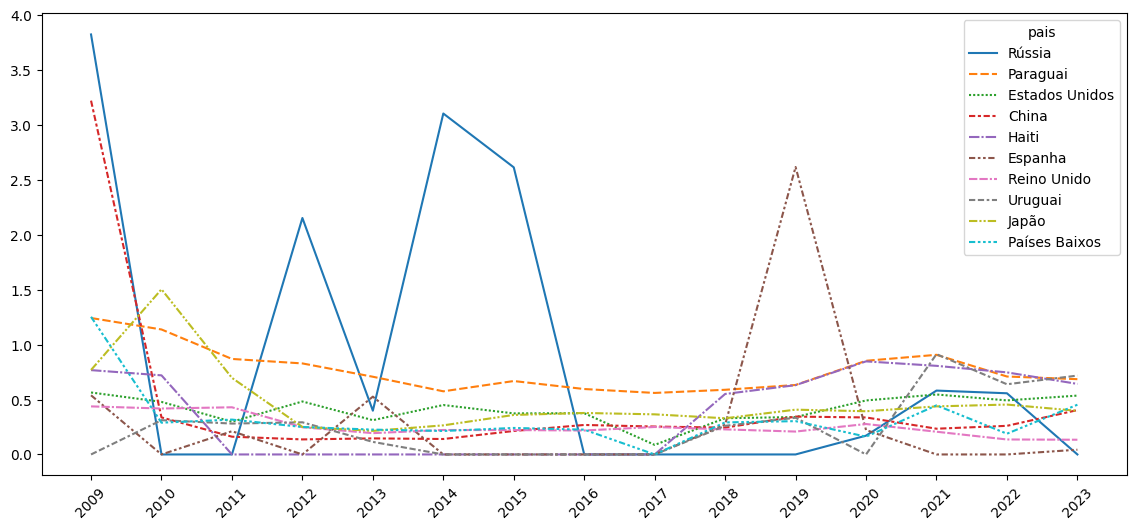

In [175]:
plt.figure(figsize=(14,6))
sns.lineplot(data=exportacao_vinho_mesa_preco_p_litro_dez_paises_por_litro.T)
plt.xticks(rotation=45)
plt.show()